In [1]:
#Load the data using pandas
#Import all the required packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time

#Reading the file into pandas
train = pd.read_csv('datatraining.txt',header = 0)
test = pd.read_csv('datatest.txt',header = 0)
print(train.head())    

#Converting timestamp to epoch values
newTime = []
pattern = '%Y-%m-%d %H:%M:%S'
for each in train['date']:
    epoch = int(time.mktime(time.strptime(each,pattern)))
    newTime.append(epoch)
train['date'] = newTime    
print(train.head())

#Converting timestamp to epoch values in test data
newTime = []
pattern = '%Y-%m-%d %H:%M:%S'
for each in test['date']:
    epoch = int(time.mktime(time.strptime(each,pattern)))
    newTime.append(epoch)
test['date'] = newTime    
print(test.head())

                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  
         date  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1  1423068660        23.18   27.2720  426.0  721.25       0.004793          1
2  1423068719        23.15   27.2675  429.5  714.00       0.004783          1
3  1423068780        23.15   27.2450  426.0  713.50       0.004779          1
4  1423068840        23.15   27.2000  426.0  708.25       0.004772          1
5  1423068900        23.10   27.2000  426.0  

In [2]:
#2.hecking for na values in any rows
print("NA's present : ",train.isnull().any().any())

NA's present :  False


In [3]:
#Seperating x and y data
xTrain = train.loc[:,train.columns != 'Occupancy']
yTrain = train.loc[:,train.columns == 'Occupancy']
xTest = test.loc[:,test.columns != 'Occupancy']
yTest = test.loc[:,test.columns == 'Occupancy']

print(xTrain.columns.values)
#Normalizing the data
for each in xTrain.columns.values:
    xTrain[each] = (xTrain[each] - xTrain[each].min())/(xTrain[each].max()-xTrain[each].min())
print(xTrain.head())

for each in xTest.columns.values:
    xTest[each] = (xTest[each] - xTest[each].min())/(xTest[each].max()-xTest[each].min())
    
#Adding bias to x data
xTrain = np.column_stack([xTrain,np.ones(len(xTrain))])
xTest = np.column_stack([xTest,np.ones(len(xTest))]) 


['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio']
       date  Temperature  Humidity     Light       CO2  HumidityRatio
1  0.000000     1.000000  0.470533  0.275490  0.190933       0.557318
2  0.000121     0.992823  0.470332  0.277754  0.186446       0.554807
3  0.000246     0.992823  0.469326  0.275490  0.186136       0.553761
4  0.000368     0.992823  0.467315  0.275490  0.182887       0.551669
5  0.000491     0.980861  0.467315  0.275490  0.180566       0.547851


/home/kritz/anaconda3/envs/scripts/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/kritz/anaconda3/envs/scripts/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
def sigmoid(X):
    dnr = 1.0 + np.e ** (-1.0 * X)
    return(1.0/dnr)

In [5]:
def logLikelihood(x, y, beta):
    scores = x.dot(beta)
    #print(x,beta)
    logLoss = np.sum(y*scores - np.log(1 + np.exp(scores)))
    return logLoss

In [6]:
#Bolddriver
def boldDriver(alpha,lossOld,lossNew):
    alphaPlus,alphaMinus = 1.2,0.9
    if float(lossNew < lossOld):
        return(alpha*alphaPlus)
    else:
        return(alpha*alphaMinus)

In [7]:
def adaGrad(gradient,history):
    alphaNew = np.random.rand(1,gradient.shape[1])
    #gradient = np.zeros((gradient.shape))
    #np.random.rand(1,gradient.shape[0]) 
    #np.zeros((1,gradient.shape[1]))
    history += np.square(gradient)
    error,master_stepsize = 0.01,0.0001
    alphaNew = (alphaNew)/(np.sqrt(history)+error)
    return((master_stepsize*alphaNew),history)  

In [8]:
#Logistic regression
def logisticRegression(x,y,xt,yt,alpha,stepLength):
    beta = np.zeros((x.shape[1],1))
    #np.random.rand(x.shape[1],1)
    print(beta)
    ii = []
    ll =[]
    lloss = []
    history = 0.0
    for i in range(1000):
        scores = x.dot(beta)
        predictions = sigmoid(scores)
        #Updating using the gradient
        error = y - predictions
        gradient = x.T.dot(error)
        print('Gradient\n\n',x.T.dot(error))
        if stepLength == "Adagrad":
            alpha,history = adaGrad(gradient,history)
        betaNew = beta + (alpha *( gradient))
        lossOld = logLikelihood(x,y,beta)
        lossNew = logLikelihood(x,y,betaNew)
        print(lossOld,lossNew)
        logLoss = float(lossNew - lossOld)
        #Bold driver step length
        if stepLength == "Bold driver":
            alpha = boldDriver(alpha,lossOld,lossNew)
            #betaNew = beta + (alpha* gradient)
        ii.append(i)
        ll.append(logLoss)
        lloss.append(yt.T.dot(np.log(sigmoid(xt.dot(beta)))) - (1-yt).T.dot(np.log(1-sigmoid(xt.dot(beta)))))
        if (logLoss < 0.0000000000000001):
            print("Optimal beta found",i+1,betaNew)
            break
        if(i == 999):
            print("Beta did not converge")
        beta = betaNew    
    plt.plot(ii,ll,color = 'green')
    plt.title("Iterations vs Difference in Objective function value")
    plt.xlabel("Iterations")
    plt.ylabel("Objective function value")
    plt.show()
    plt.plot(ii,lloss,color = 'blue')
    plt.title("Iterations vs Log Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Log Loss")
    plt.show()

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Gradient

 [[-1265.61941988]
 [ -471.32786085]
 [ -831.46202928]
 [  199.48159086]
 [  180.41492857]
 [ -508.042258  ]
 [-2342.5       ]]
Occupancy   -5644.297491
dtype: float64 Occupancy   -5562.329484
dtype: float64
Gradient

 [[-1225.88671502]
 [ -443.30603279]
 [ -799.31821556]
 [  205.20666794]
 [  190.10298347]
 [ -482.84199552]
 [-2268.94483549]]
Occupancy   -5562.329484
dtype: float64 Occupancy   -5493.176669
dtype: float64
Gradient

 [[-1191.40008947]
 [ -419.01348569]
 [ -771.43466585]
 [  210.16145502]
 [  198.48540433]
 [ -460.99132446]
 [-2205.10580804]]
Occupancy   -5493.176669
dtype: float64 Occupancy   -5434.431424
dtype: float64
Gradient

 [[-1161.37213935]
 [ -397.8836245 ]
 [ -747.1693113 ]
 [  214.46432493]
 [  205.76253149]
 [ -441.9839298 ]
 [-2149.51985856]]
Occupancy   -5434.431424
dtype: float64 Occupancy   -5384.218914
dtype: float64
Gradient

 [[-1135.14808261]
 [ -379.44707103]
 [ -725.98859361]
 [  218.21316

dtype: float64 Occupancy   -5028.222821
dtype: float64
Gradient

 [[ -932.43694364]
 [ -237.46644385]
 [ -562.6716577 ]
 [  246.8705061 ]
 [  260.43183051]
 [ -297.76985075]
 [-1725.40421898]]
Occupancy   -5028.222821
dtype: float64 Occupancy   -5027.909182
dtype: float64
Gradient

 [[ -932.24378142]
 [ -237.33162837]
 [ -562.51644218]
 [  246.89750449]
 [  260.47723308]
 [ -297.64880251]
 [-1725.04593858]]
Occupancy   -5027.909182
dtype: float64 Occupancy   -5027.627023
dtype: float64
Gradient

 [[ -932.06998258]
 [ -237.2103282 ]
 [ -562.37678689]
 [  246.92179588]
 [  260.51808307]
 [ -297.53988972]
 [-1724.72357286]]
Occupancy   -5027.627023
dtype: float64 Occupancy   -5027.373173
dtype: float64
Gradient

 [[ -931.91360183]
 [ -237.1011854 ]
 [ -562.25112845]
 [  246.94365233]
 [  260.5548381 ]
 [ -297.44189302]
 [-1724.43351385]]
Occupancy   -5027.373173
dtype: float64 Occupancy   -5027.144785
dtype: float64
Gradient

 [[ -931.77289009]
 [ -237.00297902]
 [ -562.13806121]
 [  246.

Occupancy   -5025.110413
dtype: float64 Occupancy   -5025.108624
dtype: float64
Gradient

 [[ -930.51773037]
 [ -236.12699364]
 [ -561.12951379]
 [  247.13872591]
 [  260.88287594]
 [ -296.5672004 ]
 [-1721.84438651]]
Occupancy   -5025.108624
dtype: float64 Occupancy   -5025.107014
dtype: float64
Gradient

 [[ -930.51673754]
 [ -236.12630075]
 [ -561.12871604]
 [  247.13886465]
 [  260.88310924]
 [ -296.56657828]
 [-1721.84254495]]
Occupancy   -5025.107014
dtype: float64 Occupancy   -5025.105566
dtype: float64
Gradient

 [[ -930.51584399]
 [ -236.12567715]
 [ -561.12799807]
 [  247.13898951]
 [  260.8833192 ]
 [ -296.56601838]
 [-1721.84088754]]
Occupancy   -5025.105566
dtype: float64 Occupancy   -5025.104262
dtype: float64
Gradient

 [[ -930.5150398 ]
 [ -236.12511592]
 [ -561.1273519 ]
 [  247.13910189]
 [  260.88350817]
 [ -296.56551447]
 [-1721.83939587]]
Occupancy   -5025.104262
dtype: float64 Occupancy   -5025.103088
dtype: float64
Gradient

 [[ -930.51431603]
 [ -236.1246108 ]
 

Occupancy   -5025.092628
dtype: float64 Occupancy   -5025.092618
dtype: float64
Gradient

 [[ -930.50785898]
 [ -236.12010449]
 [ -561.12158207]
 [  247.14010532]
 [  260.88519551]
 [ -296.56101494]
 [-1721.82607641]]
Occupancy   -5025.092618
dtype: float64 Occupancy   -5025.092609
dtype: float64
Gradient

 [[ -930.50785329]
 [ -236.12010052]
 [ -561.1215775 ]
 [  247.14010611]
 [  260.88519685]
 [ -296.56101138]
 [-1721.82606587]]
Occupancy   -5025.092609
dtype: float64 Occupancy   -5025.092601
dtype: float64
Gradient

 [[ -930.50784818]
 [ -236.12009695]
 [ -561.12157339]
 [  247.14010683]
 [  260.88519805]
 [ -296.56100817]
 [-1721.82605638]]
Occupancy   -5025.092601
dtype: float64 Occupancy   -5025.092593
dtype: float64
Gradient

 [[ -930.50784357]
 [ -236.12009374]
 [ -561.12156969]
 [  247.14010747]
 [  260.88519913]
 [ -296.56100528]
 [-1721.82604784]]
Occupancy   -5025.092593
dtype: float64 Occupancy   -5025.092587
dtype: float64
Gradient

 [[ -930.50783943]
 [ -236.12009084]
 

Gradient

 [[ -930.50780242]
 [ -236.12006502]
 [ -561.12153662]
 [  247.14011322]
 [  260.8852088 ]
 [ -296.5609795 ]
 [-1721.8259715 ]]
Occupancy   -5025.092527
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780239]
 [ -236.120065  ]
 [ -561.1215366 ]
 [  247.14011322]
 [  260.88520881]
 [ -296.56097948]
 [-1721.82597145]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780236]
 [ -236.12006498]
 [ -561.12153658]
 [  247.14011323]
 [  260.88520882]
 [ -296.56097946]
 [-1721.8259714 ]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780234]
 [ -236.12006496]
 [ -561.12153656]
 [  247.14011323]
 [  260.88520882]
 [ -296.56097945]
 [-1721.82597136]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780232]
 [ -236.12006495]
 [ -561.12153654]
 [  247.14011323]
 [  260.88520883]
 [ -296.56097943]
 [-1721.8

 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097932]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097931]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097931]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097931]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]


Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097931]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097931]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Gradient

 [[ -930.50780213]
 [ -236.12006481]
 [ -561.12153639]
 [  247.14011326]
 [  260.88520887]
 [ -296.56097931]
 [-1721.82597096]]
Occupancy   -5025.092526
dtype: float64 Occupancy   -5025.092526
dtype: float64
Optimal beta found 300 [[-0.10964505]
 [-0.03523895]
 [-0.0694841 ]
 [ 0.0223659 ]
 [ 0.02212786]
 [-0.04010758]
 [-0.20292703]]


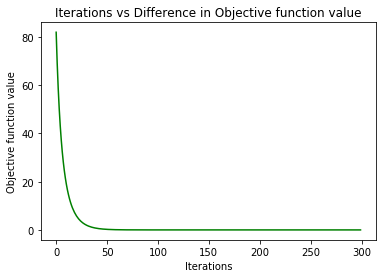

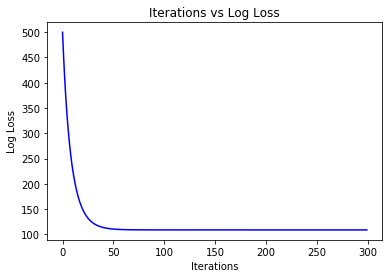

In [9]:
logisticRegression(xTrain,yTrain,xTest,yTest,0.00001,"Bold driver")

In [10]:
def sga(x,y,xt,yt,alpha,method):
    import random
    ii,ll,lloss,history = [],[],[],0
    beta = np.zeros((x.shape[1],1))
    for i in range(1000):
        #drawing a random variable
        index = random.randint(0,x.shape[0])
        X = np.array(x[index,:])
        X = np.reshape(X,(1,len(X)))
        score = X.dot(beta)
        predictions = sigmoid(score)
        Y = y.iloc[[index]]
        error = Y - predictions
        gradient = np.array(X.T.dot(error))
        #print("Gradient",gradient)
        if method == "Bold driver":
            betaNew = beta + (alpha *(gradient))
            lossOld = logLikelihood(x,y,beta)
            lossNew = logLikelihood(x,y,betaNew)
            logLoss = float(lossNew-lossOld)
            alpha = boldDriver(alpha,lossOld,lossNew)
        elif method == "adaGrad": 
            alpha,history = adaGrad(gradient,history)
            betaNew = beta + (alpha.T.dot(gradient))
            lossOld = logLikelihood(x,y,beta)
            lossNew = logLikelihood(x,y,betaNew)
            logLoss = float(lossNew-lossOld)
        ii.append(i)
        ll.append(logLoss)
        lloss.append(yt.T.dot(np.log(sigmoid(xt.dot(beta)))) - (1-yt).T.dot(np.log(1-sigmoid(xt.dot(beta)))))
        if (logLoss < 0.00000000000000000000000000000001):
            print("Optimal beta found",i+1,betaNew)
            break
        if(i == 999):
            print("Beta did not converge")
        beta = betaNew 
    plt.plot(ii,ll,color = 'green')
    plt.title("Iterations vs Difference in Objective function value")
    plt.xlabel("Iterations")
    plt.ylabel("Objective function value")
    plt.show()
    plt.plot(ii,lloss,color = 'blue')
    plt.title("Iterations vs Log Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Log Loss")
    plt.show()

Optimal beta found 10 [[ -1.62269668e-14]
 [ -8.14448128e-15]
 [ -1.34101406e-14]
 [  4.77819579e-16]
 [ -3.06278248e-15]
 [ -1.00391069e-14]
 [ -2.86918731e-14]]


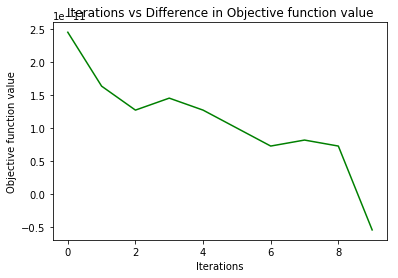

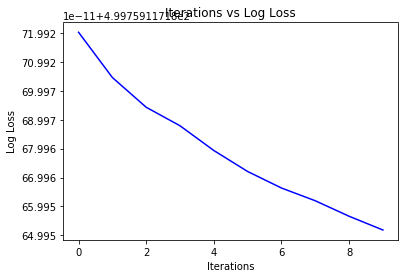

In [23]:
sga(xTrain,yTrain,xTest,yTest,0.00000000000001,"Bold driver")

Optimal beta found 11 [[-0.00099355]
 [-0.00099355]
 [-0.00099355]
 [-0.00099355]
 [-0.00099355]
 [-0.00099355]
 [-0.00099355]]


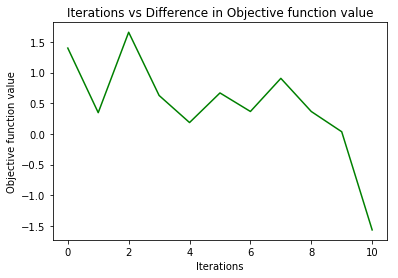

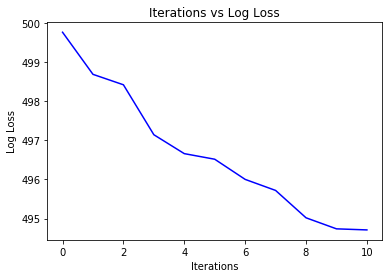

In [12]:
sga(xTrain,yTrain,xTest,yTest,0.0000000000001,"adaGrad")

In [24]:
def sgd(x,y,xt,yt,alpha,method):
    import random
    ii,ll,lloss,history = [],[],[],0
    beta = np.zeros((x.shape[1],1))
    for i in range(1000):
        #drawing a random variable
        index = random.randint(0,x.shape[0])
        X = np.array(x[index,:])
        X = np.reshape(X,(1,len(X)))
        score = X.dot(beta)
        predictions = sigmoid(score)
        Y = y.iloc[[index]]
        error = Y - predictions
        gradient = np.array(X.T.dot(error))
        if method == "Bold driver":
            betaNew = beta - (alpha *(gradient))
            lossOld = logLikelihood(x,y,beta)
            lossNew = logLikelihood(x,y,betaNew)
            logLoss = float(lossOld-lossNew)
            alpha = boldDriver(alpha,lossOld,lossNew)
        elif method == "adaGrad": 
            alpha,history = adaGrad(gradient,history)
            betaNew = beta - (alpha.T.dot(gradient))
            lossOld = logLikelihood(x,y,beta)
            lossNew = logLikelihood(x,y,betaNew)
            logLoss = float(lossOld-lossNew)
        ii.append(i)
        ll.append(logLoss)
        lloss.append(yt.T.dot(np.log(sigmoid(xt.dot(beta)))) - (1-yt).T.dot(np.log(1-sigmoid(xt.dot(beta)))))
        if (logLoss < 0.000000000000000001):
            print("Optimal beta found",i+1,betaNew)
            break
        if(i == 999):
            print("Beta did not converge")
        beta = betaNew 
    plt.plot(ii,np.abs(ll),color = 'green')
    plt.title("Iterations vs Difference in Objective function value")
    plt.xlabel("Iterations")
    plt.ylabel("Objective function value")
    plt.show()
    plt.plot(ii,lloss,color = 'blue')
    plt.title("Iterations vs Log Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Log Loss")
    plt.show()

Optimal beta found 8 [[  3.57674401e-12]
 [  3.64259460e-13]
 [  1.62221237e-12]
 [ -7.61493505e-13]
 [ -3.91577680e-13]
 [  8.26451817e-13]
 [  4.66636160e-12]]


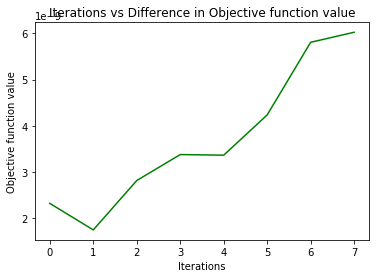

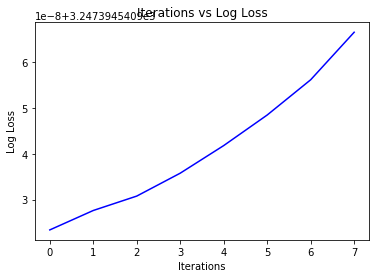

In [25]:
sgd(xTrain,yTrain,xTrain,yTrain,0.000000000001,"Bold driver")

Optimal beta found 7 [[ 0.0004738]
 [ 0.0004738]
 [ 0.0004738]
 [ 0.0004738]
 [ 0.0004738]
 [ 0.0004738]
 [ 0.0004738]]


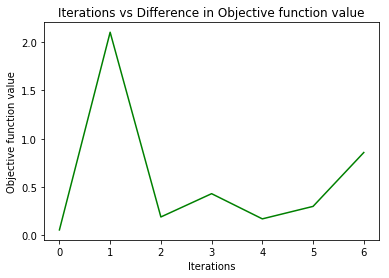

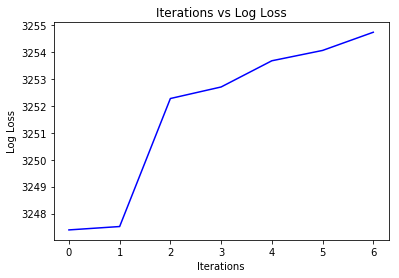

In [27]:
sgd(xTrain,yTrain,xTrain,yTrain,0.00000000000001,"adaGrad")